## Initiate the vissim instance

In [2]:
# COM-Server
import win32com.client as com
import igraph
import matplotlib.pyplot as plt

Add autocompletion for VISSIM COM Object

In [3]:
from IPython.utils.generics import complete_object

@complete_object.register(com.DispatchBaseClass)
def complete_dispatch_base_class(obj, prev_completions):
    try:
        ole_props = set(obj._prop_map_get_).union(set(obj._prop_map_put_))
        return list(ole_props) + prev_completions
    except AttributeError:
        pass

Start Vissim and load constants

In [4]:
Vissim = com.gencache.EnsureDispatch("Vissim.Vissim")
from win32com.client import constants as c

Load the test network

In [5]:
FileName = r"E:\Thesis\Inital test network"
Vissim.LoadNet(FileName + ".inpx")
Vissim.LoadLayout(FileName + ".layx")

In [6]:
Net = Vissim.Net
Net.DynamicAssignment.CreateGraph(c.CGEdgeTypeDynamicAssignment);

## Read the dynamic assignment nodes and edges

In [13]:
edge0=Net.Edges.GetAll()[0]

In [44]:
NodeAttributes = [att.Code for att in Net.Nodes.Attributes.GetAll()]
EdgeAttributes = [att.Code for att in Net.Edges.Attributes.GetAll()]

In [46]:
vis_edges = Net.Edges.FilteredBy("IsTurn=0").GetMultipleAttributes(['No','FromNode','ToNode','Length','IsTurn'])
vis_nodes = Net.Nodes.GetMultipleAttributes(['No','Name'])

com_error: (-2147352567, 'Exception occurred.', (0, 'VISSIM.Vissim.900', 'CComNetObjCont::get_FilteredBy failed: An error occurred when trying to calculate formula "IsTurn=0": "A variable ist not permitted:"IsTurn"."', None, 0, -2147352567), None)

In [45]:
EdgeAttributes

['No',
 'FromNode',
 'ToNode',
 'Type',
 'IsTurn',
 'Closed',
 'FromEdges',
 'ToEdges',
 'Length',
 'LinkSeq',
 'LOSType',
 'LOS',
 'LOSVal',
 'TravTmNew',
 'TravTmOld',
 'VolNew',
 'VolOld',
 'ConvTravTm',
 'ConvVol',
 'TravTmRaw',
 'ExistsInScen']

convert the indexing from 1-index to 0-index

### Convert the network to a igraph directed graph

In [10]:
network_graph = igraph.Graph()
network_graph.add_nodes_from([(node[0],{'name':node[1]}) for node in vis_nodes])
network_graph.add_edges_from([(int(edge[1]), int(edge[2]), edge[0], {'length':edge[3]}) for edge in vis_edges if not edge[4]])

[1, 2, 3, 4, 5, 6, 7]

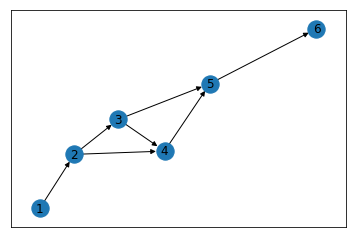

In [14]:
nx.draw_networkx(network_graph)
plt.show()

In [18]:
list(network_graph.edges(data=True))

[(1, 2, {'length': 313.36294311506504}),
 (2, 3, {'length': 97.92742538856004}),
 (2, 4, {'length': 397.0004873093225}),
 (3, 4, {'length': 251.51398039394118}),
 (3, 5, {'length': 355.54824216605465}),
 (4, 5, {'length': 127.43448245769032}),
 (5, 6, {'length': 182.38195771661447})]

detach Vissim instance

In [47]:
Vissim.Exit()
del Vissim